In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
import IPython.display as ipd 
from pydub import AudioSegment 
from pydub.utils import mediainfo

c:\Users\micha\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
noisy_speech = AudioSegment.from_wav('NoisySignal/Station/sp01_station_sn5.wav')   
noisy_s = noisy_speech.get_array_of_samples()  # samples x(t) 
noisy_f = noisy_speech.frame_rate  # sampling rate f 

Text(0, 0.5, 'Amplitude')

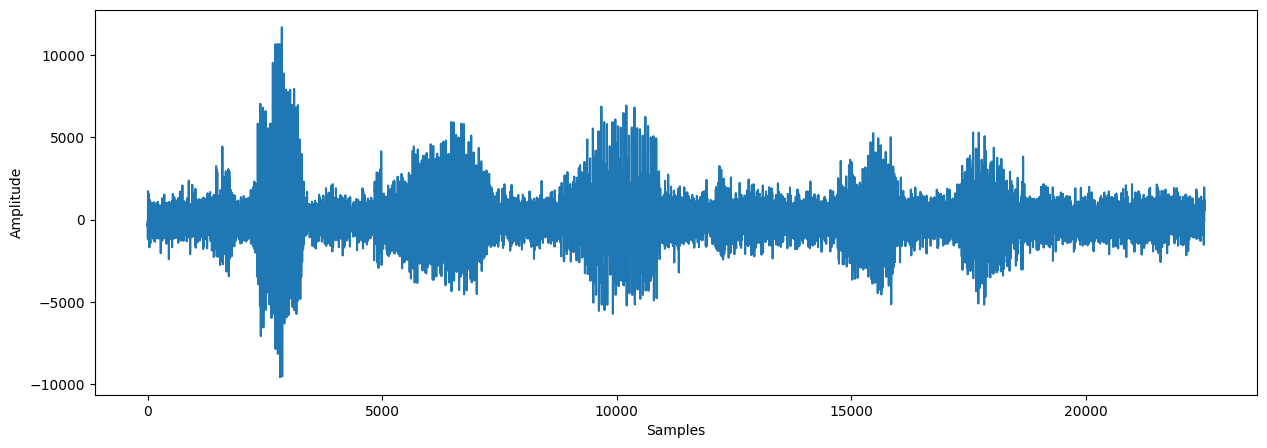

In [3]:
plt.figure(figsize = (15, 5)) 
plt.plot(noisy_s) 
plt.xlabel('Samples') 
plt.ylabel('Amplitude') 

c:\Users\micha\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\micha\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\micha\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


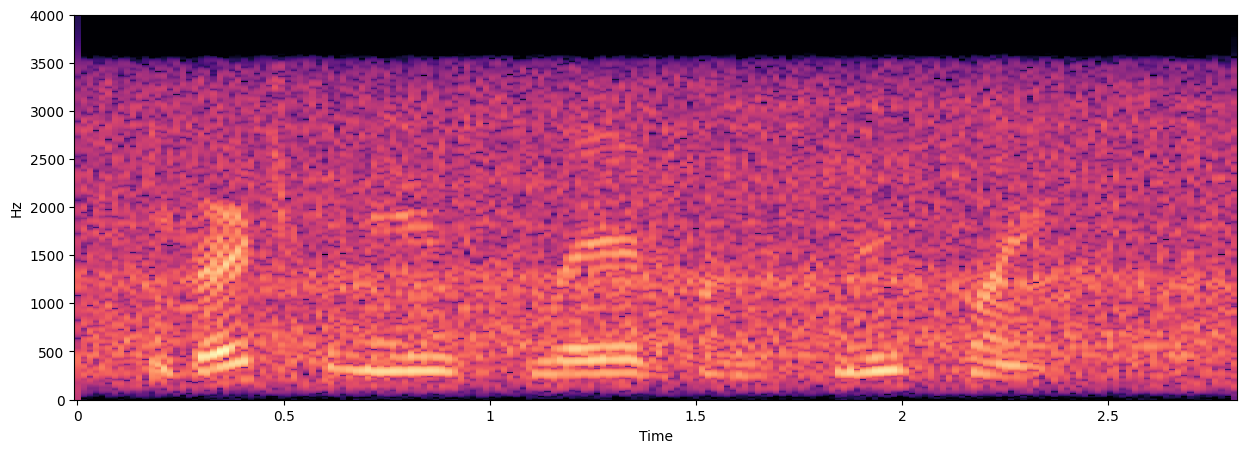

In [4]:
#range of frequencies of interest for speech signal.  
#It can be any positive value, but should be a power of 2 
freq_range = 2048 
 
#window size: the number of samples per frame. Each frame is of 30ms = 0.03 sec 
win_length = int(noisy_f * 0.03) 
 
#number of samples between two consecutive frames 
hop_length = int(win_length / 2) 
 
#windowing technique 
window = 'hann' 
 
noisy_S = librosa.stft(np.float32(noisy_s),  
                       n_fft = freq_range,  
                       window = window,  
                       hop_length = hop_length,  
                       win_length = win_length) 
 
plt.figure(figsize = (15, 5)) 
 
#convert the amplitude to decibels, just for illustration purpose 
noisy_Sdb = librosa.amplitude_to_db(abs(noisy_S)) 
librosa.display.specshow(noisy_Sdb, #spectrogram 
                        sr = noisy_f, #sampling rate     
                        x_axis = 'time', #label for horizontal axis                     
                        y_axis = 'linear', #presentation scale 
                        hop_length = hop_length) #hop_length

In [5]:
from scipy import signal 
 
#order 
order = 10 
 
#sampling frequency 
sampling_freq = noisy_f 
 
#cut-off frequency. This can be an array if band-pass filter is used 
#this must be within 0 and cutoff_freq/2 
cutoff_freq = 1000 
 
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’ 
filter_type = 'lowpass' 
 
#filter 
h = signal.butter(N = order,  
                  fs = sampling_freq,  
                  Wn = cutoff_freq,  
                  btype = filter_type,  
                  analog = False,  
                  output = 'sos')

In [6]:
filtered_s = signal.sosfilt(h, noisy_s) 

In [7]:
import array 
import pydub 
from pydub import AudioSegment 
 
filtered_s_audio = pydub.AudioSegment( 
         data = array.array(noisy_speech.array_type,  
        filtered_s.astype(np.int16)), #raw data             
         sample_width = 2, #2 bytes = 16 bit samples                 
         frame_rate = noisy_f, #frame rate 
         channels = 1) #channels = 1 for mono and 2 for stereo 
 
filtered_s_audio.export('sp01_station_sn5_lowpass.wav', format = 'wav') 

<_io.BufferedRandom name='sp01_station_sn5_lowpass.wav'>

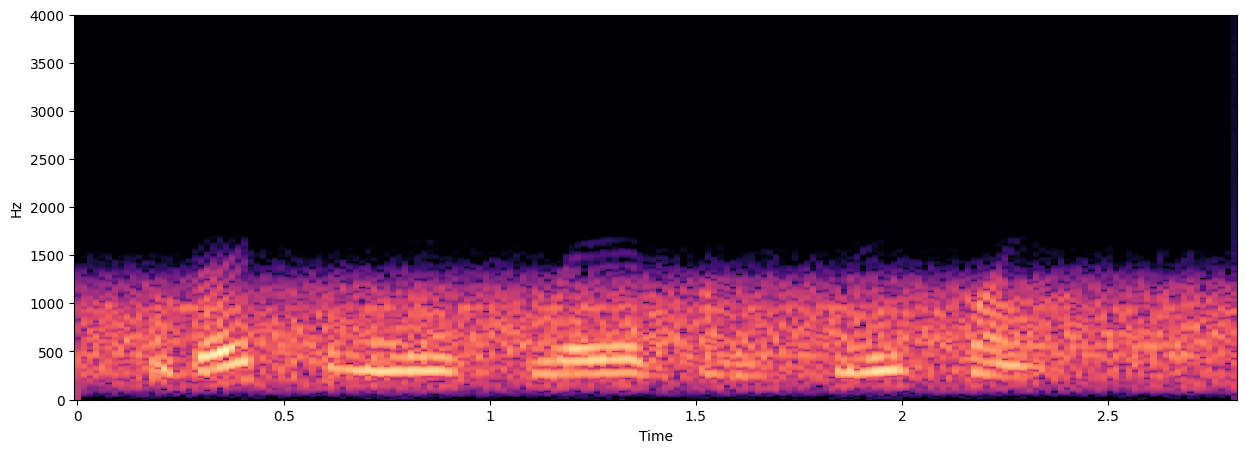

In [8]:
noisy_filtered_s = filtered_s_audio.get_array_of_samples()

noisy_filtered_S = librosa.stft(np.float32(noisy_filtered_s),  
                       n_fft = freq_range,  
                       window = window,  
                       hop_length = hop_length,  
                       win_length = win_length) 
 
plt.figure(figsize = (15, 5)) 
 
#convert the amplitude to decibels, just for illustration purpose 
noisy_filtered_Sdb = librosa.amplitude_to_db(abs(noisy_filtered_S)) 
librosa.display.specshow(noisy_filtered_Sdb, #spectrogram 
                        sr = noisy_f, #sampling rate     
                        x_axis = 'time', #label for horizontal axis                     
                        y_axis = 'linear', #presentation scale 
                        hop_length = hop_length) #hop_length

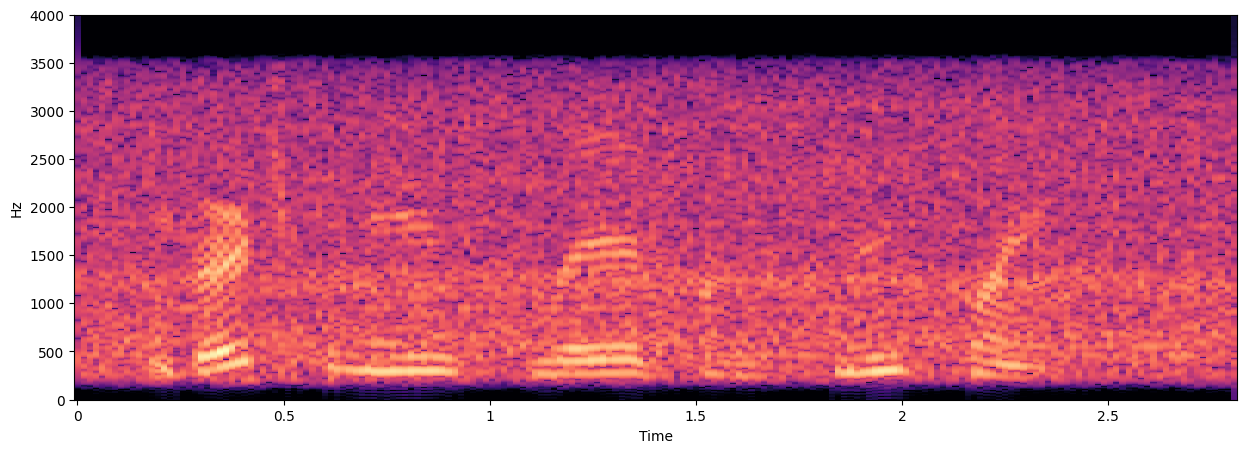

In [9]:
#cut-off frequency. This can be an array if band-pass filter is used 
#this must be within 0 and cutoff_freq/2 
cutoff_freq = 200 
 
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’ 
filter_type = 'highpass' 
 
#filter 
h = signal.butter(N = order,  
                  fs = sampling_freq,  
                  Wn = cutoff_freq,  
                  btype = filter_type,  
                  analog = False,  
                  output = 'sos')

filtered_s_highpass = signal.sosfilt(h, noisy_s) 

filtered_s_highpass_audio = pydub.AudioSegment( 
         data = array.array(noisy_speech.array_type,  
        filtered_s_highpass.astype(np.int16)), #raw data             
         sample_width = 2, #2 bytes = 16 bit samples                 
         frame_rate = noisy_f, #frame rate 
         channels = 1) #channels = 1 for mono and 2 for stereo 

noisy_filtered_s_highpass = filtered_s_highpass_audio.get_array_of_samples()

noisy_filtered_S_highpass = librosa.stft(np.float32(noisy_filtered_s_highpass),  
                       n_fft = freq_range,  
                       window = window,  
                       hop_length = hop_length,  
                       win_length = win_length) 
 
plt.figure(figsize = (15, 5)) 
 
#convert the amplitude to decibels, just for illustration purpose 
noisy_filtered_Sdb_highpass = librosa.amplitude_to_db(abs(noisy_filtered_S_highpass)) 
librosa.display.specshow(noisy_filtered_Sdb_highpass, #spectrogram 
                        sr = noisy_f, #sampling rate     
                        x_axis = 'time', #label for horizontal axis                     
                        y_axis = 'linear', #presentation scale 
                        hop_length = hop_length) #hop_length

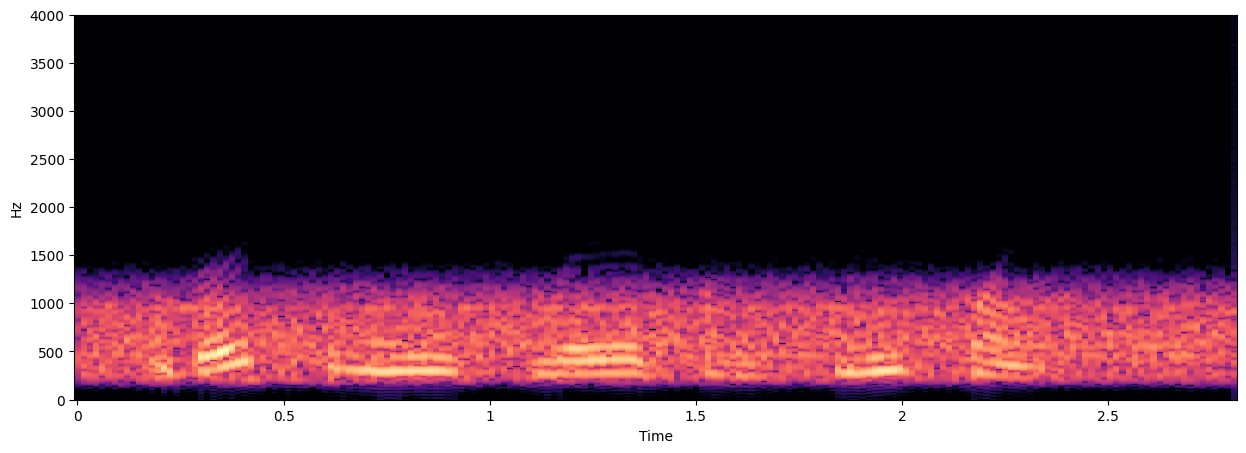

In [10]:
#cut-off frequency. This can be an array if band-pass filter is used 
#this must be within 0 and cutoff_freq/2 
cutoff_freq = [200, 1000] 
 
#filter type, e.g., 'lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’ 
filter_type = 'bandpass' 
 
#filter 
h = signal.butter(N = order,  
                  fs = sampling_freq,  
                  Wn = cutoff_freq,  
                  btype = filter_type,  
                  analog = False,  
                  output = 'sos')

filtered_s_bandpass = signal.sosfilt(h, noisy_s) 

filtered_s_bandpass_audio = pydub.AudioSegment( 
         data = array.array(noisy_speech.array_type,  
        filtered_s_bandpass.astype(np.int16)), #raw data             
         sample_width = 2, #2 bytes = 16 bit samples                 
         frame_rate = noisy_f, #frame rate 
         channels = 1) #channels = 1 for mono and 2 for stereo 

noisy_filtered_s_bandpass = filtered_s_bandpass_audio.get_array_of_samples()

noisy_filtered_S_bandpass = librosa.stft(np.float32(noisy_filtered_s_bandpass),  
                       n_fft = freq_range,  
                       window = window,  
                       hop_length = hop_length,  
                       win_length = win_length) 
 
plt.figure(figsize = (15, 5)) 
 
#convert the amplitude to decibels, just for illustration purpose 
noisy_filtered_Sdb_bandpass = librosa.amplitude_to_db(abs(noisy_filtered_S_bandpass)) 
librosa.display.specshow(noisy_filtered_Sdb_bandpass, #spectrogram 
                        sr = noisy_f, #sampling rate     
                        x_axis = 'time', #label for horizontal axis                     
                        y_axis = 'linear', #presentation scale 
                        hop_length = hop_length) #hop_length

In [43]:
noisy_speech = AudioSegment.from_wav('NoisySignal/Babble/sp03_babble_sn5.wav') 
y = noisy_speech.get_array_of_samples()  # samples x(t) 
y_f = noisy_speech.frame_rate  # sampling rate f  
win_length = int(y_f * 0.03) # Each frame is of 30ms = 0.03 sec 
hop_length = int(win_length / 2) #number of samples between two consecutive frames 
Y = librosa.stft(np.float32(y),  
                n_fft = 2048,  
                window = 'hann',  
                hop_length = hop_length,  
                win_length = win_length) 
mag_Y = abs(Y) 

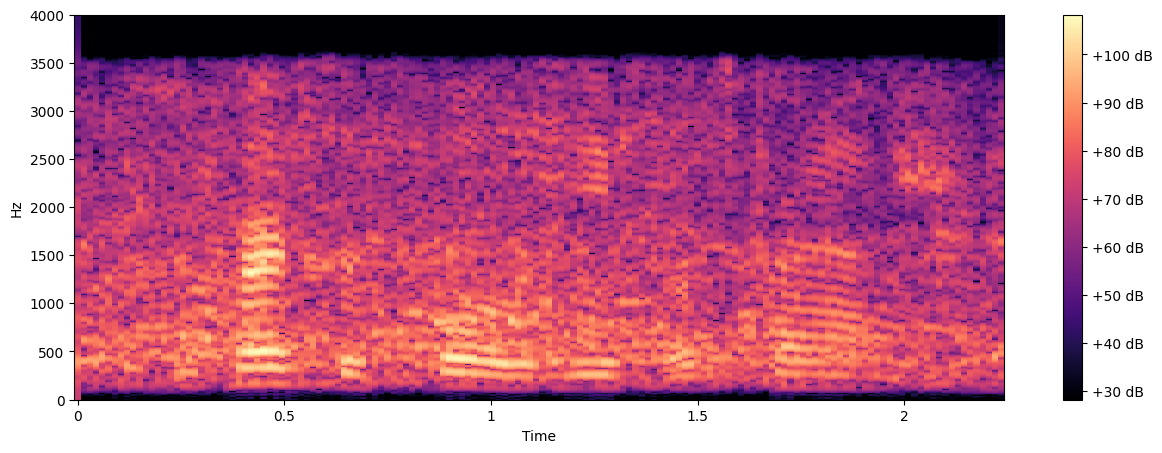

In [44]:
y_S = librosa.stft(np.float32(y), 
                    n_fft=2048, 
                    window='hann', 
                    hop_length=hop_length, 
                    win_length=win_length)
y_Sdb = librosa.amplitude_to_db(abs(y_S))
plt.figure(figsize=(15, 5))
librosa.display.specshow(y_Sdb, sr=y_f, x_axis='time', y_axis='linear', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [45]:
# Load noise signal and compute STFT, squared magnitude, and mean squared magnitude
noise = AudioSegment.from_wav('Noise/Babble/Babble_1.wav')
d = noise.get_array_of_samples()  # noise samples
d_f = noise.frame_rate  # sampling rate

D = librosa.stft(np.float32(d), 
                n_fft=2048, 
                window='hann', 
                hop_length=hop_length, 
                win_length=win_length)

square_mag_D = np.abs(D) ** 2
means_square_mag_D = np.mean(square_mag_D, axis=1)  # mean over time frames

In [46]:
# Compute spectral subtraction filter H and estimate S_hat
H = 1 - (means_square_mag_D[:, np.newaxis] / (mag_Y ** 2 + 1e-8))
H = np.clip(H, 0, 1)  # Ensure H is non-negative and <= 1

S_hat = H * Y  # Apply filter to noisy speech spectrum

# Inverse STFT to retrieve s_hat
s_hat = librosa.istft(S_hat, win_length=win_length, hop_length=hop_length, length=len(y))

# Truncate values to 16-bit range and save as WAV
s_hat_truncated = np.int16(s_hat)
for i, num in enumerate(s_hat_truncated): 
    if num > 32767: 
        s_hat_truncated[i] = 32767 
    elif num < -32768: 
        s_hat_truncated[i] = -32768 

import array
s_hat_audio = AudioSegment(
    data=array.array('h', s_hat_truncated),
    sample_width=2,
    frame_rate=y_f,
    channels=1)

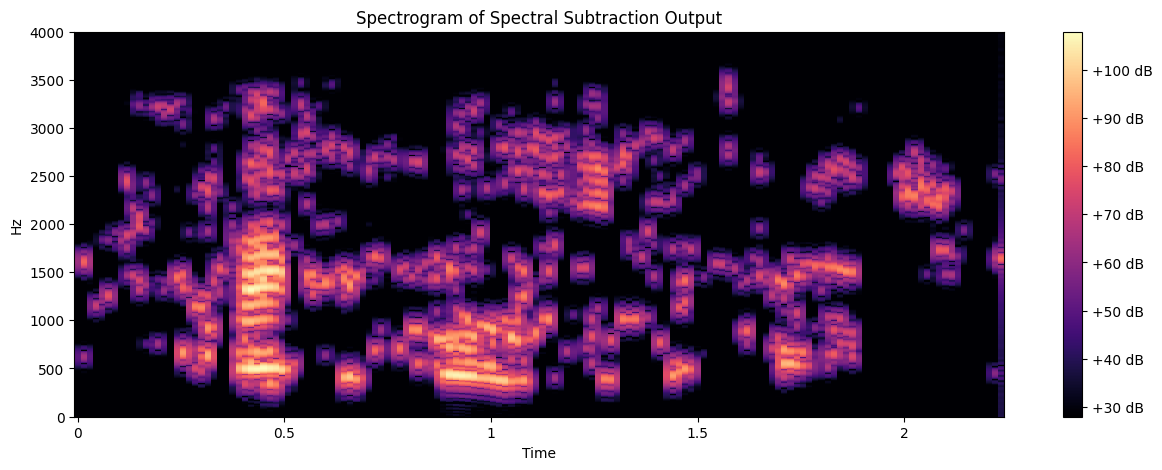

In [47]:
# Visualize spectrogram of processed and clean signals
processed = s_hat_audio
processed_samples = processed.get_array_of_samples()
processed_S = librosa.stft(np.float32(processed_samples), 
                        n_fft=2048, 
                        window='hann', 
                        hop_length=hop_length, 
                        win_length=win_length)
processed_Sdb = librosa.amplitude_to_db(abs(processed_S))
plt.figure(figsize=(15, 5))
librosa.display.specshow(processed_Sdb, sr=y_f, x_axis='time', y_axis='linear', hop_length=hop_length)
plt.title('Spectrogram of Spectral Subtraction Output')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Observations and Conclusions
- The spectral subtraction algorithm reduces noise but may introduce artifacts (musical noise) and may not fully restore clean speech quality.
- Compare the spectrograms and listen to the output to evaluate performance.
- Try the algorithm on other files in the NoisySignal folder and note differences for various noise types.
- Spectral subtraction is a simple method and may not achieve outstanding noise reduction, but it demonstrates basic noise attenuation principles.